#The Sparks Foundation's Graduate Rotational Internship Program (GRIP)
##Data Science & Business Analytics' Task
###Prediction using Supervised ML
####(Level - Beginner)
* To Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* Dataset is available at http://bit.ly/w-data 
* We will try to predict a student's score when a student studies for 9.25 hrs/ day?

##By - Viranchi Bhure

##Importing all libraries required

In [2]:
import pandas
import numpy
import matplotlib

%matplotlib inline

##Reading data from the URL

In [3]:
url = "http://bit.ly/w-data"
dataset = pandas.read_csv(url)
print("Data has been imported successfully.")
print()
print(dataset)

Data has been imported successfully.

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


##Checking for any missing values

In [4]:
print("Missing Value : ",dataset.isnull().sum().values.sum())

Missing Value :  0


##Summary and some basic statistical details about the data

In [5]:
print(dataset.shape)

(25, 2)


In [6]:
print(dataset.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [8]:
print(dataset.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


##Visualizing the data
###Plotting the data on two dimensinal graph to visualize the dataset and see if we can detect any relationship between the data. We will create the graph with the following code:

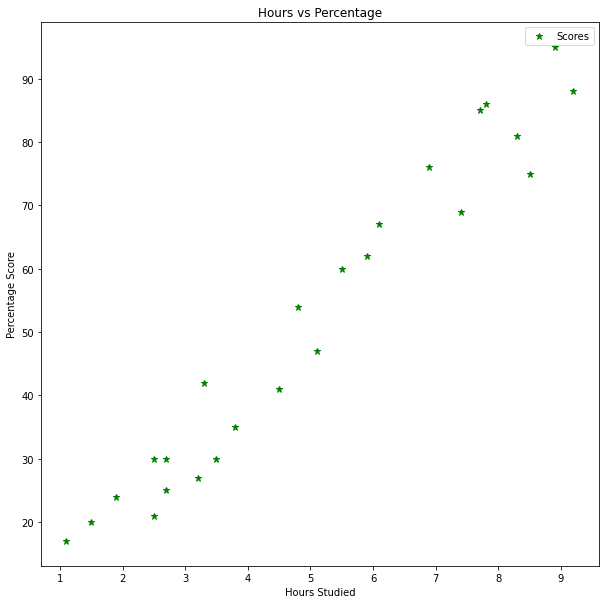

In [9]:
matplotlib.pyplot.rcParams["figure.figsize"] = [10,10]
dataset.plot(x='Hours', y='Scores', style='*', color='green', markersize=7)
matplotlib.pyplot.title('Hours vs Percentage')  
matplotlib.pyplot.xlabel('Hours Studied') 
matplotlib.pyplot.ylabel('Percentage Score')  
matplotlib.pyplot.show()

####We observed linear relation between the  and percentage and number of hours studiedbased from the graph.

##Preparing the data
####We will mark the data into "features" (inputs) and "labels". Features are the inputs and labels are the output.

In [10]:
X = dataset.iloc[:, :-1].values  
Y = dataset.iloc[:, 1].values

print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


####We marked our attributes and labels. Now to split the data into training and test sets. Splitting the data helps us effectively test our algorithm against unknown data.

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [12]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


##Training the model
####Choosing the model

In [18]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  

####Fitting the model

In [19]:
regressor.fit(X_train, Y_train) 

print("Training complete")

Training complete


##Visualizing the model

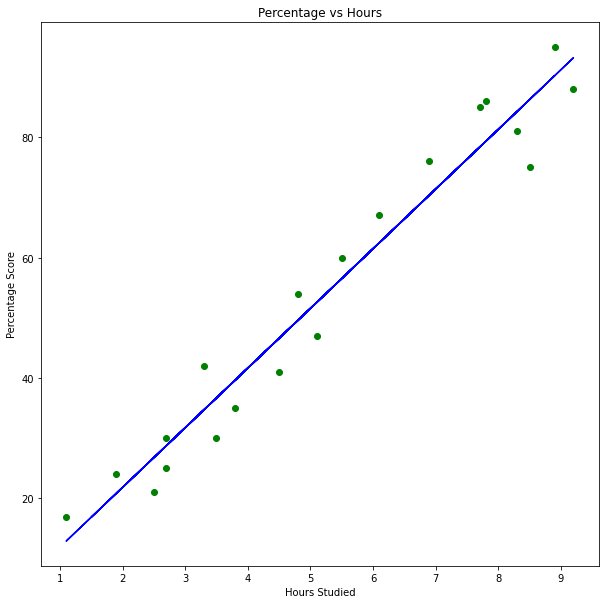

In [20]:
line = regressor.coef_*X+regressor.intercept_

matplotlib.pyplot.scatter(X_train, Y_train, color='green')
matplotlib.pyplot.plot(X, line, color='blue');
matplotlib.pyplot.rcParams["figure.figsize"] = [10,10]
matplotlib.pyplot.title('Percentage vs Hours')
matplotlib.pyplot.xlabel('Hours Studied')  
matplotlib.pyplot.ylabel('Percentage Score')
matplotlib.pyplot.show()

##Making Predictions

In [21]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


####Evaluating Predictions

In [24]:
df = pandas.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


####Coefficient of determination

In [25]:
print(regressor.score(X_test, Y_test))

0.9454906892105354


##Making the predictions

In [26]:
hours = numpy.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


##Error Value

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
